
# SAMPLING DISTRIBUTION
A sampling distribution is the frequency distribution of a statistic over many random samples from a single population.

Let’s draw a sample of size n=250 from the normal distribution. Here we are assuming that our data is normally distributed and has parameters μ = 20 and σ = 3. Collecting one sample from this population

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
mu, sigma = 20, 3
sample = np.random.normal(mu, sigma, 250)
x_bar = sample.mean()
print(x_bar)

19.957487233308335


if I ran this code 10,000 times and recorded the values of x̅ and plotted the frequency (or density) of the values, I would get the following result.

[Text(0.5, 0, 'Sample Mean'), Text(0, 0.5, 'Density')]

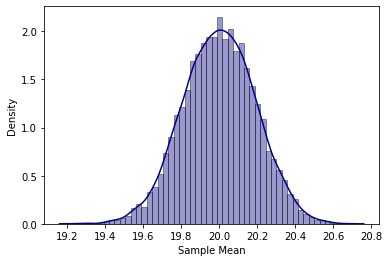

In [2]:
import numpy as np
import seaborn as sns
samples = np.zeros(10000)
mu, sigma = 20, 3
for s in range(10000):
    sample = np.random.normal(mu, sigma, 250)  #sample of size 250
    x_bar = sample.mean()                      #calculating sample mean
    samples[s] = x_bar
sns.distplot(samples, hist = True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}).set(xlabel = 'Sample Mean', 
                                           ylabel = 'Density')

As you can see, the distribution is approximately symmetric and bell-shaped (just like the normal distribution) with an average of approximately 20 and a standard error that is approximately equal to 3/sqrt(250) = 0.19.
Sampling from the same population with different sample sizes will result in different measures of spread in the outcome distribution. As we expect, increasing the sample size will reduce the standard error and therefore, the distribution will be narrower around its average. Note that the distribution of X̅ is normal even for extremely small sample sizes. This is because X is normally distributed.


 Even if your data is not normally distributed, if the sample size is large enough, the distribution of X̅ can still be approximated using the normal distribution (according to Central Limit Theorem). The following figure shows the distribution of X̅ when X is heavily skewed to the left. As you can see, X̅’s distribution tends to mimic the distribution of X for small sample sizes. However, as sample size grows the distribution of X̅ becomes more symmetric and bell-shaped. As mentioned above, if sample size is large (usually larger than 30), X̅’s distribution is approximately normal regardless of what the distribution of X is.

Bootstrapping is a method of performing sampling, wherein samples are taken for experimentation, and then put back into the data set to be picked again — this is also described as “sampling with replacement”.

In [3]:
import numpy as np
students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])
#Perform some sampling for a specific parameter, in this case, the mean.
sample_props = []
for _ in range(10000):
    #Notice we are using "replace=True" to put samples back.
    sample = np.random.choice(students, 5, replace=True)
    sample_props.append(sample.mean())

Law of Large Numbers
The larger our sample size, the closer our statistic gets to our parameter.
That is, the more often we test our sample data, the closer it gets to a certain value — the parameter. If this is hard to picture, see real-world examples presented here and here. In addition, the example below might help.

104.39459134295969
95.77456470638238
77.77031519262766
86.34187603717788


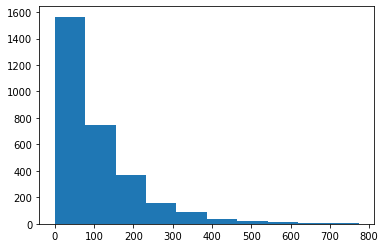

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# This is just setting up some random data in pop_data
# The functionality of the gamma distribution is not relevant
pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);
#Population Mean, used as a baseline.
print(pop_data.mean())

random = np.random.choice(pop_data, size = 5).mean()
print(random)
random = np.random.choice(pop_data, size = 20).mean()
print(random)
random = np.random.choice(pop_data, size = 100).mean()
print(random)
#As you can see, the larger the sample size, the closer we get to the population mean.

The Central Limit Theorem
With a large enough sample size, the sampling distribution of the mean will be normally distributed
There are a few well known statistics this applies to (but not all):
Sample means,
Sample proportions,
Difference in sample means,
Difference in sample proportions.

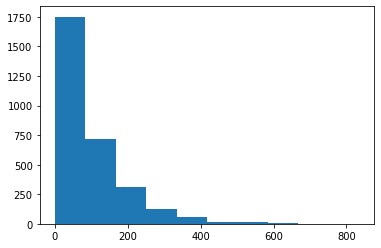

In [5]:
#First we'll look at what our data's graph looks like
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

[ 67.90844791 111.45266177  76.43658707 ...  64.94420006  42.56254318
 180.47980079]


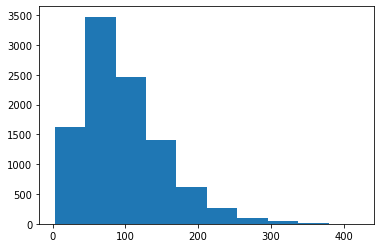

In [6]:
#That doesn't look normally distributed. Lets try a sample size of #3, and simulate that 10000 times
means_size_3 = []
for x in range(10000):
    mean = np.random.choice(pop_data, size = 3).mean()
    means_size_3.append(mean)
means_size_3 = np.array(means_size_3)
print(means_size_3)
plt.hist(means_size_3);

(array([  24.,  256., 1287., 2700., 2950., 1872.,  699.,  174.,   32.,
           6.]),
 array([ 63.43470119,  71.11625004,  78.79779889,  86.47934773,
         94.16089658, 101.84244543, 109.52399428, 117.20554313,
        124.88709198, 132.56864083, 140.25018967]),
 <BarContainer object of 10 artists>)

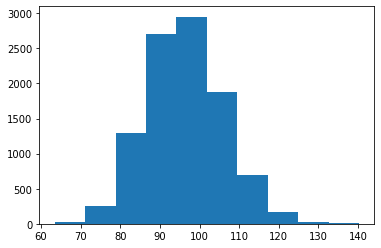

In [7]:
#Let's try a sample size of 10000 
means = []
for x in range (10000):
    mean = np.random.choice(pop_data, size = 100).mean()
    means.append(mean)
means = np.array(means)
plt.hist(means)

what would happen to the sampling distribution if we had a population which followed some other distribution say, Binomial distribution for example.

Would the sampling distribution still resemble the normal distribution for large sample sizes as stated by the CLT?

Let's test it out. The following represents our Binomially distributed population (recall that Binomial is a discrete distribution and hence we produce the probability mass function below):

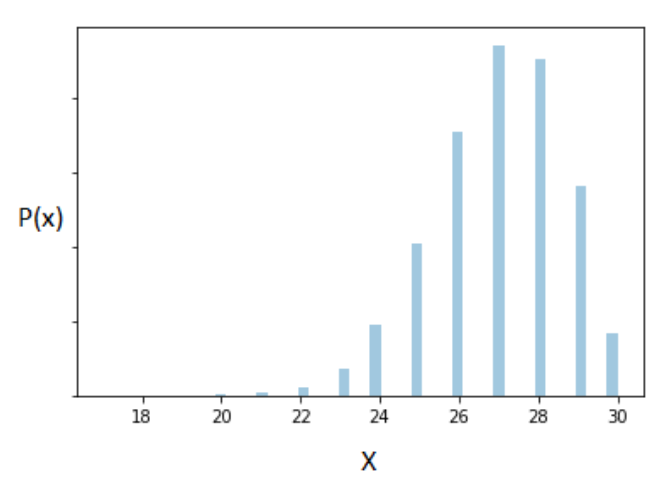

plot the sampling distribution obtained with a large sample size (n = 500) for a Binomially distributed variable with parameters k=30 and p = 0.9

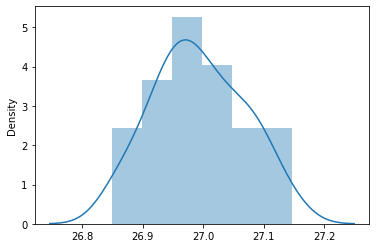

In [8]:
import pandas as pd
# drawing 50 random samples of size 500 from a Binomial distribution with parameters k= 30 and p=0.9
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.binomial(30,0.9, sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

# Plotting the sampling distribution from a 
df500_sample_means_binomial = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means_binomial);

For this example, as we assumed that our population follows a Binomial distribution with parameters k = 30 and p =0.9

Which means if CLT were to hold, the sampling distribution should be approximately normal with mean = population 
mean = μ=27
and standard deviation =σ/√n = 0.0734.

In [9]:
# Mean of sample means is close to the population mean
df500_sample_means_binomial.mean().values[0]

26.992640000000005

In [10]:
# Standard deviation of sample means is close to population standard deviation divided by square root of sample size
df500_sample_means_binomial.std().values[0]

0.07539007675728528

And the CLT holds again, as can be seen in the above plot.

The sampling distribution for a Binomially distributed population also tends to a normal distribution with mean=μ

 and standard deviation =σ/√n  for large sample size.

# Poisson

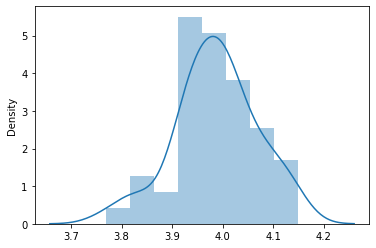

In [11]:
import pandas as pd
# drawing 50 random samples of size 500 from a Poisson distribution lamda=4
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.poisson(4, sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

# Plotting the sampling distribution from a 
df500_sample_means_poisson = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means_poisson);

# Geometric

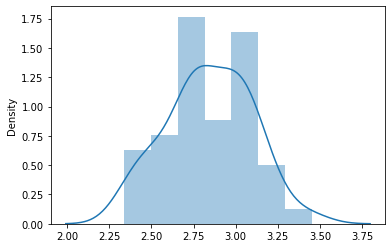

In [12]:
import pandas as pd
# drawing 50 random samples of size 100 from a geometric p=0.35
sample_size=100

df100 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.geometric(0.35, sample_size)
    col = f'sample {i}'
    df100[col] = exponential_sample

# Plotting the sampling distribution from a 
df100_sample_means_poisson = pd.DataFrame(df100.mean(),columns=['Sample means'])
sns.distplot(df100_sample_means_poisson);

# hypergeometric

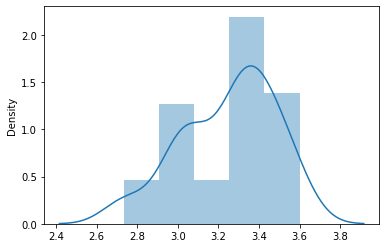

In [13]:
import pandas as pd
# drawing 50 random samples of size 500 from a hypergeometric
#x=2,N=15,r=9,r=5
sample_size=5

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.hypergeometric(9,5,sample_size,15)
    col = f'sample {i}'
    df500[col] = exponential_sample

# Plotting the sampling distribution from a 
df500_sample_means_hypergeometric = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means_hypergeometric);